# Lab 2: Understanding Preprocessing/Evaluation Metrics
Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **4BSc DS A** <br>

---------------

### `Objectives:`
<br>

1) From the attached file, load the three different sheets as "df1", "df2", and "df3" onto the memory of Jupyter Notebook, as Python DataFrames.  <br>
2) Write the user defined functions for the implementation of following -  
2.1) To find the measures of central tendency. Another function parameter can select what type of value should be returned.
- Mean
- Median
- Mode
2.2) To scale a list of Numerical Values between 0 and 1 (minimum and maximum will be respectively 0, and 1).  
2.3) Given a number and a set of values (in a list), find the percentile of the number in that array set.  
2.4) Given a set of values, categorise the datapoints into - LEFT_OUTLIER, MIN, Q1, Q2, Q3, MAX, RIGHT_OUTLIER, and plot the above values onto an axis.  
2.5) Given two sets of values, find the correlation between them.  
2.6)To encode and decode a Categorical Variable into a Numerical Representation.  
2.7) To check the goodness of fit for the Regression Model using Evaluation Metrics. The evaluation metrics can be selected based on a parameter ("R2", "MSE", "MAE").  
- R-Squared (R² or the coefficient of determination)
- Mean Squared Error
- Mean Absolute Error

3) Make use of the above user-defined functions, and illustrate the results. In addition that, perform the below tasks -
3.1) Test the User Defined Functions that you code for various functionalities, and verify its validity by comparing with functions in sklearn.preprocessing.  
3.2) Find the percentile of the number "last two digits of your register number + 10" in df2.  
3.3) Check whether the dataset size affects the values of Regression Evaluation Metrics.  
3.4) Is there any relationship between the Squared Pearson Correlation Coefficient and R2 value?

### `Problem Definition: `
Creating user-defined functions of already existing sci-kit pre-processing functions.

### `Results:`  
1. As the size of the dataset increases, the MAE also increases.  
2. It can be seen that the square of correlation if almost equal to the R2 Score.  
3. The user-defined functions and the in-built functions give the same results.

### `References:  `
1. Stack Overflow  
2. Geeks for Geeks  
3. scikit-learn API 
4. W3School
5. Matplotlib API

### `Completion Status:`

| Question Number | Status |
| --- | --- |
| 1 | Completed |
| 2 | Completed |
| 2.1 | Completed |
| 2.2 | Completed |
| 2.3 | Completed |
| 2.4 | Completed |
| 2.5 | Completed |
| 2.6 | Completed |
| 2.7.1 | Completed |
| 2.7.2 | Completed |
| 2.7.3 | Completed |
| 3.1 | Completed |
| 3.2 | Completed |
| 3.3 | Completed |
| 3.4 | Completed |

## `Code:`

#### Q1)  From the attached file, load the three different sheets as "df1", "df2", and "df3" onto the memory of Jupyter Notebook, as Python DataFrames.

In [49]:
# Importing all the necessary libraries/modules
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import random
import numpy
from secrets import randbelow
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# --- Importing the datsets onto python ---

df1 = pd.read_excel("D:/Z/Downloads/Lab2_UDF_Labs.xlsx", sheet_name = 'Dataset1')
df2 = pd.read_excel("D:/Z/Downloads/Lab2_UDF_Labs.xlsx", sheet_name = 'Dataset2')
df3 = pd.read_excel("D:/Z/Downloads/Lab2_UDF_Labs.xlsx", sheet_name = 'Dataset3')

In [3]:
df1.head()

,True_Value,Predicted_Value
0,10,10
1,17,17
2,26,24
3,30,31
4,31,31


In [4]:
df2.head()

,True_Value,Predicted_Value
0,10,10
1,16,17
2,17,17
3,20,19
4,26,24


In [5]:
df3.head()

,True_Value,Result,Predicted_Value
0,10,Fail,10
1,16,Fail,17
2,17,Fail,17
3,20,Fail,19
4,26,Fail,24


#### Q2.1) To find the measures of central tendency. Another function parameter can select what type of value should be returned.  
- Mean
- Median
- Mode

In [6]:
# --- Bubble sort to sort an array ---
def bubbleSort(array):
    
    array_ = array
    length = len(array_)
    for i in range(0, length):
        for j in range(0, length-i-1):
            
            if array_[j] > array_[j+1]:
                
                temp = array_[j]
                array_[j] = array_[j+1]
                array_[j+1] = temp
    return array_

In [7]:
# --- Count of occurence of each element in a list ---
def countUnique(unique_list, array):
    count_unique = {}
    
    for i in range(len(unique_list)):
        k = 0
        for j in range(len(array)):
            if array[j] == unique_list[i]:
                k += 1
        count_unique[unique_list[i]] = k
    return count_unique

In [8]:
def cenTen(array, cen_ten):
    
    if (cen_ten == "Mean") or (cen_ten == "mean"):
        mean = 0
        for i in range(len(array)):
            mean += array[i]
        mean /= len(array)
        return mean
        
    elif (cen_ten == "Median") or (cen_ten == "median"):
        median = 0
        col = array
        col = bubbleSort(col)
        
        if (len(col) % 2) == 0:
            mid_num = int(len(col)/2 - 1)
            next_num = int((len(col)/2))
            median = (col[mid_num] + col[next_num]) / 2
            
        else:
            mid_num = (len(col)+1)/2 - 1
            median = col[mid_num]
        return median
            
    else:
        list_unique = []
        for item in array: 
            if item not in list_unique: 
                list_unique.append(item) 
                
        dict_ = countUnique(list_unique, array)
        mode = 0
        
        for key in dict_:
            value = dict_[key]
            if value>mode:
                mode = value
        mode = [i for i in dict_ if dict_[i]==mode]
        return mode[0]

#### Q2.2) To scale a list of Numerical Values between 0 and 1 (minimum and maximum will be respectively 0, and 1)  <br>
*Formula* : x_new = x - Min / Max - Min

In [9]:
def scale(array, scale):
    array_new = []
    for i in range(len(array)):
        array_new.append(((array[i] - min(array))/(max(array)-min(array)))*scale)
    return array_new

#### Q2.3) Given a number and a set of values (in a list), find the percentile of the number in that array set.  
<br>
Percentile = (Number of Values Below “x” / Total Number of Values) × 100

In [81]:
def percentile(array):
    array_ = bubbleSort(array)
    array_new = []
    dict_new = {}
    
    for i in range(len(array_)):
        array_new.append(round(((len(array_[:i]))/len(array_))*100))
        dict_new[array_[i]] = array_new[i]
    
    return dict_new

In [82]:
# --- Testing Percentile ---
set1 = [1, 5, 5, 5, 5, 2, 3, 3, 4, 4, 4, 5, 5, 6, 4, 4, 4]
percentile(set1)

{1: 0, 2: 6, 3: 18, 4: 53, 5: 88, 6: 94}

#### Q2.4) Given a set of values, categorise the datapoints into - LEFT_OUTLIER, MIN, Q1, Q2, Q3, MAX, RIGHT_OUTLIER, and plot the above values onto an axis

In [112]:
def boxPlot(array):
    array_ = bubbleSort(array)
    print(array_)
    
    q1 = array[(len(array_)+1)//4]
    q2 = array[(len(array_)+1)//2]
    q3 = array[(3*(len(array_)+1))//4]
    iqr = q3 - q1
    minimum = q1 - (iqr*1.5)
    maximum = q3 + (iqr*1.5)
    
    if max(array_)<maximum:
        maximum = max(array_)
    
    if min(array_)>minimum:
        minimum = min(array_)
        
    left_outlier = []
    right_outlier = []
    
    for i in range(len(array_)):
        if array_[i] < minimum:
            left_outlier.append(array_[i])
        if array_[i] > maximum:
            right_outlier.append(array_[i])
            
    left_y = [0] * len(left_outlier)
    right_y = [0] * len(right_outlier)
    
    print("\nMinimum:", minimum, "\nQ1:", q1, "\nQ2:", q2, "\nQ3:", q3, "\nMaximum:", maximum)
    print("\nLeft Outilers (magenta):", left_outlier, "\nRight Outliers (magenta):", right_outlier)
        
    values = [minimum, q1, q2, q3, maximum]
    labels = [0, 0, 0, 0, 0]
    fig = plt.scatter(x = values, y = labels, color = ['black', 'blue', 'red', 'blue', 'black'])
    fig2 = plt.scatter(x = left_outlier, y = left_y, color = 'magenta')
    fig3 = plt.scatter(x = right_outlier, y = right_y, color = 'magenta')

[10, 17, 26, 30, 31, 32, 35, 36, 38, 39, 40, 40, 42, 44, 48]

Minimum: 14.5 
Q1: 31 
Q2: 38 
Q3: 42 
Maximum: 48

Left Outilers (magenta): [10] 
Right Outliers (magenta): []


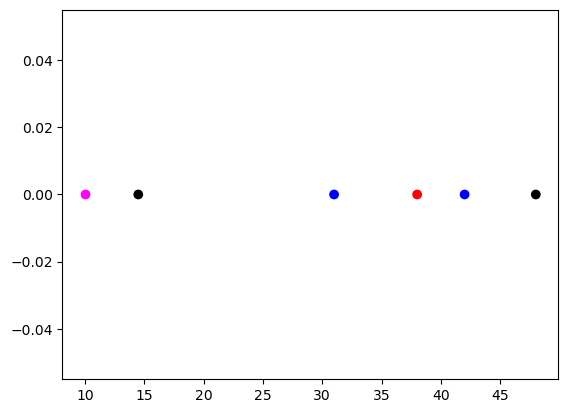

In [113]:
boxPlot(df1['True_Value'].to_list())

#### Q2.5) Given two sets of values, find the correlation between them

In [66]:
def correlation(array1, array2):
    mean_arr1 = cenTen(array1, "mean")
    mean_arr2 = cenTen(array2, "mean")
    
    numerator = 0
    denominator1 = 0
    denominator2 = 0
    for i in range(len(array1)):
        numerator += (array1[i] - mean_arr1)*(array2[i] - mean_arr2)
        denominator1 += (array1[i] - mean_arr1)**2
        denominator2 += (array2[i] - mean_arr2)**2
        
    denominator = ((denominator1)*(denominator2))**(1/2)
    correlation = (numerator/denominator)
    
    return correlation

In [67]:
# --- Testing Correlation ---
set1 = [1, 5, 5, 5, 5, 2, 3, 3, 4, 4, 4, 5, 5, 6, 4, 4, 4]
set2 = [3, 3, 4, 4, 4, 5, 5, 6, 4, 4, 4, 1, 5, 5, 5, 5, 2]

In [68]:
correlation(set1, set2)

-0.12264150943396238

In [69]:
numpy.corrcoef(set1,set2)

array([[ 1.        , -0.12264151],
       [-0.12264151,  1.        ]])

The user-defined function and the in-built function give the same results

#### Q2.6) To encode and decode a Categorical Variable into a Numerical Representation.

In [18]:
def encodeCat(arr):
    array = arr.copy()
    list_unique = []
    for item in array: 
        if item not in list_unique: 
            list_unique.append(item) 
            
    list_unique.sort()
    
    range_ = []
    for i in range(len(list_unique)):
        range_.append(i)
        
    for i in range(len(list_unique)):
        for j in range(len(array)):
            if array[j] == list_unique[i]:
                array[j] = range_[i]
    return array

In [19]:
def decodeCat(arr, categories):
    array = arr.copy()
    list_unique = []
    for item in array: 
        if item not in list_unique: 
            list_unique.append(item) 
            
    list_unique.sort()
    categories.sort()
    
    for i in range(len(list_unique)):
        for j in range(len(array)):
            if array[j] == list_unique[i]:
                array[j] = categories[i]
    return array

#### Q2.7) To check the goodness of fit for the Regression Model using Evaluation Metrics. The evaluation metrics can be selected based on a parameter ("R2", "MSE", "MAE").
- R-Squared (R² or the coefficient of determination)
- Mean Squared Error
- Mean Absolute Error

In [20]:
def evaluationMetrics(true_arr, predicted_arr, type_of_metric):
    if type_of_metric == "R2":
        true_arr_mean = cenTen(true_arr, "mean")
        SSR = 0
        SST = 0
        
        for i in range(len(true_arr)):
            SSR += (true_arr[i] - predicted_arr[i])**2
            SST += (true_arr[i] - true_arr_mean)**2
            
        r2_score = 1 - (SSR/SST)
        return r2_score
        
    if type_of_metric == "MSE":
        mse = 0
        
        for i in range(len(true_arr)):
            mse += (true_arr[i] - predicted_arr[i])**2
            
        mse /= len(true_arr)
        return mse
    
    if type_of_metric == "MAE":
        mae = 0
        
        for i in range(len(true_arr)):
            mae += abs((predicted_arr[i] - true_arr[i]))
            
        mae /= len(true_arr)
        return mae

#### Q3.1) Test the User Defined Functions that you code for various functionalities, and verify its validity by comparing with functions in sklearn.preprocessing 

In [50]:
# --- Testing Mean ---
mean_mct = cenTen(df3["Predicted_Value"].to_list(), "mean")
mean_ = df3["Predicted_Value"].mean()

print("The user-defined function and the in-built function give the same results:", mean_mct == mean_)

The user-defined function and the in-built function give the same results: True


In [51]:
# --- Testing Median ---
median_mct = cenTen(df2["True_Value"].to_list(), "median")
median_ = statistics.median(df2["True_Value"])

print("The user-defined function and the in-built function give the same results:", median_mct == median_)

The user-defined function and the in-built function give the same results: True


In [52]:
# --- Testing Mode ---
mode_mct = cenTen(df2["True_Value"].to_list(), "mode")
mode_ = statistics.mode(df2["True_Value"])

print("The user-defined function and the in-built function give the same results:", mode_mct == mode_)

The user-defined function and the in-built function give the same results: True


In [24]:
# --- Testing Encoding --- 
list1 = ['Car', 'Car', 'Bike', 'Activa', 'Activa', 'Bike', 'Bike']
list2 = [2, 2, 1, 0, 0, 1, 1]

In [25]:
encodeCat(list1)

[2, 2, 1, 0, 0, 1, 1]

In [26]:
decodeCat(list1, ['Car', 'Bike', 'Activa'])

['Car', 'Car', 'Bike', 'Activa', 'Activa', 'Bike', 'Bike']

In [27]:
# --- Testing Scaling ---
set1 = [1, 5, 5, 5, 5, 2, 3, 3, 4, 4, 4, 5, 5, 6, 4, 4, 4]
scale_ = scale(set1, 99)
scale_

[0.0,
 79.2,
 79.2,
 79.2,
 79.2,
 19.8,
 39.6,
 39.6,
 59.4,
 59.4,
 59.4,
 79.2,
 79.2,
 99.0,
 59.4,
 59.4,
 59.4]

In [37]:
# --- Testing R2 Score 
r2_score_func = evaluationMetrics(df1['True_Value'].to_list(), df1['Predicted_Value'].to_list(), "R2")
r2 = r2_score(df1['True_Value'], df1['Predicted_Value'])

print("The user-defined function and the in-built function give the same results:", r2_score_func == r2)

The user-defined function and the in-built function give the same results: True


In [38]:
# --- Testing MSE ---
mse_func = evaluationMetrics(df2['True_Value'].to_list(), df2['Predicted_Value'].to_list(), "MSE")
mse = mean_squared_error(df2['True_Value'], df2['Predicted_Value'])

print("The user-defined function and the in-built function give the same results:", mse_func == mse)

The user-defined function and the in-built function give the same results: True


In [39]:
# --- Testing MAE ---
mae_func = evaluationMetrics(df3['True_Value'].to_list(), df3['Predicted_Value'].to_list(), "MAE")
mae = mean_absolute_error(df3['True_Value'], df3['Predicted_Value'])

print("The user-defined function and the in-built function give the same results:", mae_func == mae)

The user-defined function and the in-built function give the same results: True


#### Q3.2) Find the percentile of the number "last two digits of your register number + 10" in df2.

In [83]:
perc_list1 = list(df2['True_Value'])
perc_list1.append(26) # 16(register number) + 10 = 26

percentile(perc_list1)

{10: 0,
 16: 3,
 17: 6,
 20: 10,
 26: 16,
 28: 19,
 30: 23,
 31: 29,
 32: 35,
 34: 39,
 35: 42,
 36: 48,
 37: 52,
 38: 58,
 39: 65,
 40: 74,
 41: 77,
 42: 84,
 44: 87,
 46: 90,
 48: 94,
 49: 97}

In [84]:
perc_list2 = list(df2['True_Value'])
perc_list2.append(26) # 16(register number) + 10 = 26

percentile(perc_list2)

{10: 0,
 16: 3,
 17: 6,
 20: 10,
 26: 16,
 28: 19,
 30: 23,
 31: 29,
 32: 35,
 34: 39,
 35: 42,
 36: 48,
 37: 52,
 38: 58,
 39: 65,
 40: 74,
 41: 77,
 42: 84,
 44: 87,
 46: 90,
 48: 94,
 49: 97}

#### Q3.3) Check whether the dataset size affects the values of Regression Evaluation Metrics

In [34]:
# Creating a user-defined function to generate a list of random numbers within a range
def Rand(start, end, num):
    res = []
 
    for j in range(num):
        res.append(random.randint(start, end))
 
    return res

In [80]:
print("MAE of df1:", evaluationMetrics(df1['True_Value'].to_list(), df1['Predicted_Value'].to_list(), "MAE"))
print("MAE df2:", evaluationMetrics(df2['True_Value'].to_list(), df2['Predicted_Value'].to_list(), "MAE"))

MAE of df1: 0.8666666666666667
MAE df2: 0.9


*Inference*: As the size of the dataset increases, the MAE also increases.

#### Q3.4) Is there any relationship between the Squared Pearson Correlation Coefficient and R2 value?

In [70]:
# --- Correlation ---
correlation(df1['True_Value'].to_list(), df1['Predicted_Value'].to_list())

0.9926079531311157

In [71]:
# --- R2 Score ---
evaluationMetrics(df1['True_Value'].to_list(), df1['Predicted_Value'].to_list(), "R2")

0.9825872956909361

In [72]:
# It can be seen that the square of correlation if almost equal to the R2 Score
(correlation(df1['True_Value'].to_list(), df1['Predicted_Value'].to_list()))**2

0.9852705486191432

<hr>